In [1]:
#importing libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv(r"C:\Users\Dell\gitproject\Stock Market prediction usng LSTM\NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Data Exploration and cleaning

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
df.shape

(1009, 7)

In [7]:
df.shape[0]

1009

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
#check for non null values
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [11]:
#check for null vlaaues
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#check for required columns
df= df[['Date','Open','Close']]

#convert object dtype of date column to datetime type
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))

In [13]:
df.set_index('Date',drop = True , inplace = True)
df.head()

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001


Visualization of data

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

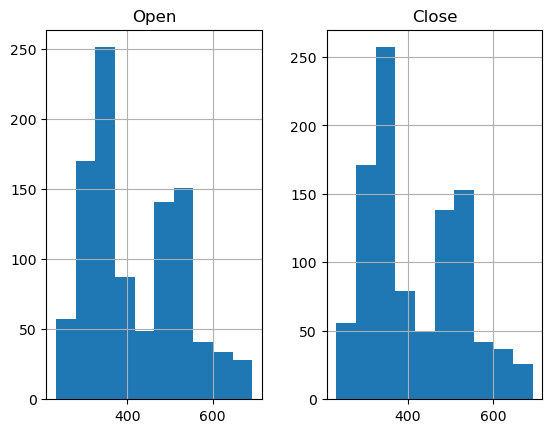

In [14]:
df.hist()

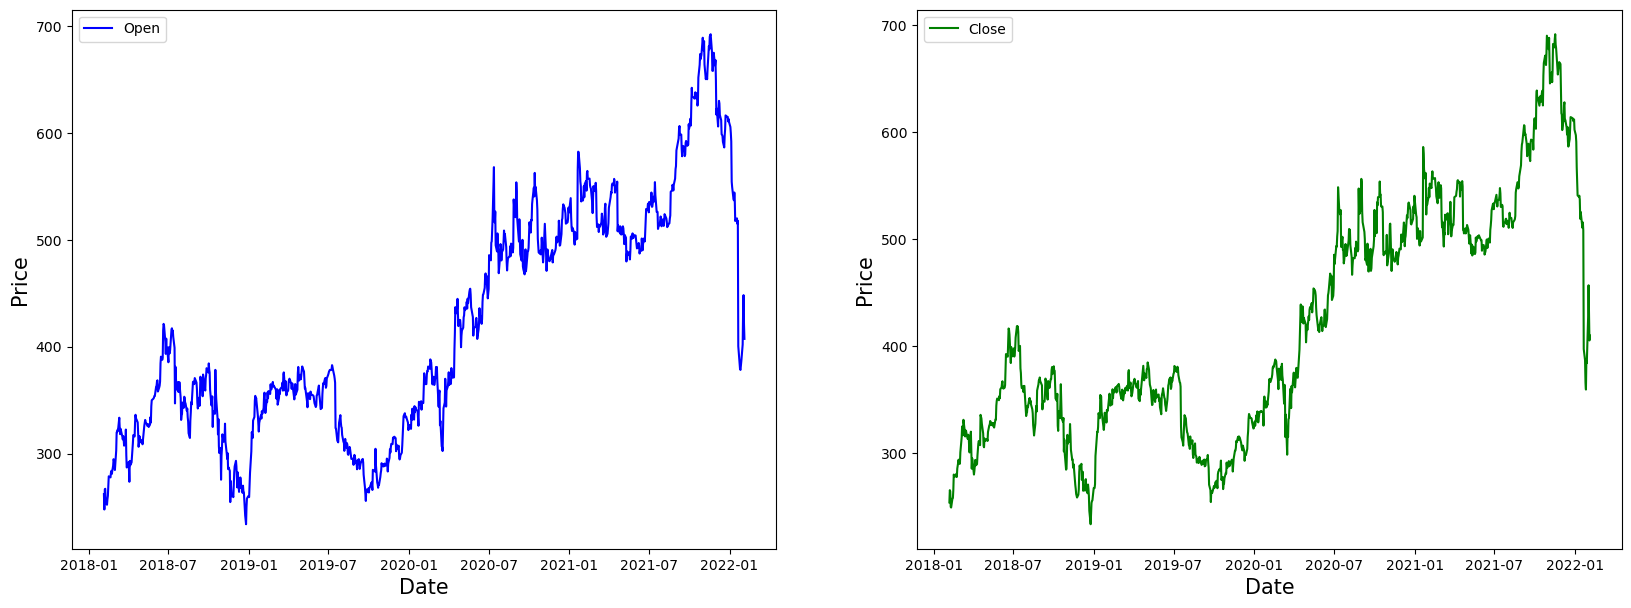

In [17]:
#plotting open and close price on date index
fig , ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label ='Open',color = 'blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

Preprocessing of data

In [19]:
#normalIzing all the values of all columns using min maxscaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [20]:

# splitting the data into train and test set
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75)

In [21]:
training_size

757

In [22]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 2), (252, 2))

In [23]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [24]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

In [25]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7,952
Trainable params: 7,952
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
23/23 [==============================] - 12s 129ms/step - loss: 0.0423 - mean_absolute_error: 0.1514 - val_loss: 0.0300 - val_mean_absolute_error: 0.1429
Epoch 2/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0062 - mean_absolute_error: 0.0616 - val_loss: 0.0189 - val_mean_absolute_error: 0.1068
Epoch 3/100
23/23 [==============================] - 2s 70ms/step - loss: 0.0033 - mean_absolute_error: 0.0436 - val_loss: 0.0103 - val_mean_absolute_error: 0.0745
Epoch 4/100
23/23 [==============================] - 1s 60ms/step - loss: 0.0027 - mean_absolute_error: 0.0400 - val_loss: 0.0088 - val_mean_absolute_error: 0.0682
Epoch 5/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0026 - mean_absolute_error: 0.0396 - val_loss: 0.0085 - val_mean_absolute_error: 0.0669
Epoch 6/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0025 - mean_absolute_error: 0.0385 - val_loss: 0.0093 - val_mean_absolute_error: 0.0721
Epoch 7/100
23

23/23 [==============================] - 1s 65ms/step - loss: 0.0015 - mean_absolute_error: 0.0284 - val_loss: 0.0036 - val_mean_absolute_error: 0.0431
Epoch 51/100
23/23 [==============================] - 2s 75ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 0.0032 - val_mean_absolute_error: 0.0394
Epoch 52/100
23/23 [==============================] - 2s 78ms/step - loss: 0.0015 - mean_absolute_error: 0.0296 - val_loss: 0.0034 - val_mean_absolute_error: 0.0413
Epoch 53/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - val_loss: 0.0037 - val_mean_absolute_error: 0.0434
Epoch 54/100
23/23 [==============================] - 1s 62ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - val_loss: 0.0036 - val_mean_absolute_error: 0.0427
Epoch 55/100
23/23 [==============================] - 2s 69ms/step - loss: 0.0014 - mean_absolute_error: 0.0278 - val_loss: 0.0029 - val_mean_absolute_error: 0.0376
Epoch 56/100
23/23 [===

23/23 [==============================] - 2s 66ms/step - loss: 7.0105e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0041 - val_mean_absolute_error: 0.0460
Epoch 100/100
23/23 [==============================] - 1s 56ms/step - loss: 7.1509e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0039 - val_mean_absolute_error: 0.0450


In [27]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 4s 17ms/step


array([[0.6804719 , 0.67050016],
       [0.6248829 , 0.61535865],
       [0.5972288 , 0.5904826 ],
       [0.59138906, 0.58615154],
       [0.5991332 , 0.5942715 ]], dtype=float32)

In [28]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[545.8687 , 540.8417 ],
       [520.385  , 515.59735],
       [507.70758, 504.20886],
       [505.0305 , 502.226  ],
       [508.5806 , 505.94342]], dtype=float32)

In [29]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)


In [30]:
# Inversing normalization/scaling
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,545.868713,540.841675
2021-04-22,513.820007,508.779999,520.385010,515.597351
2021-04-23,509.010010,505.549988,507.707581,504.208862
2021-04-26,506.760010,510.299988,505.030487,502.226013
2021-04-27,512.619995,505.549988,508.580597,505.943420


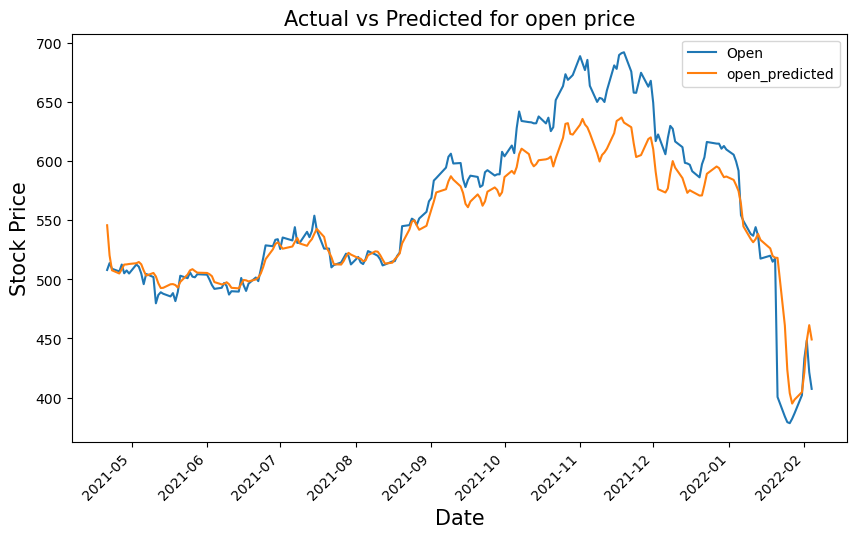

In [31]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

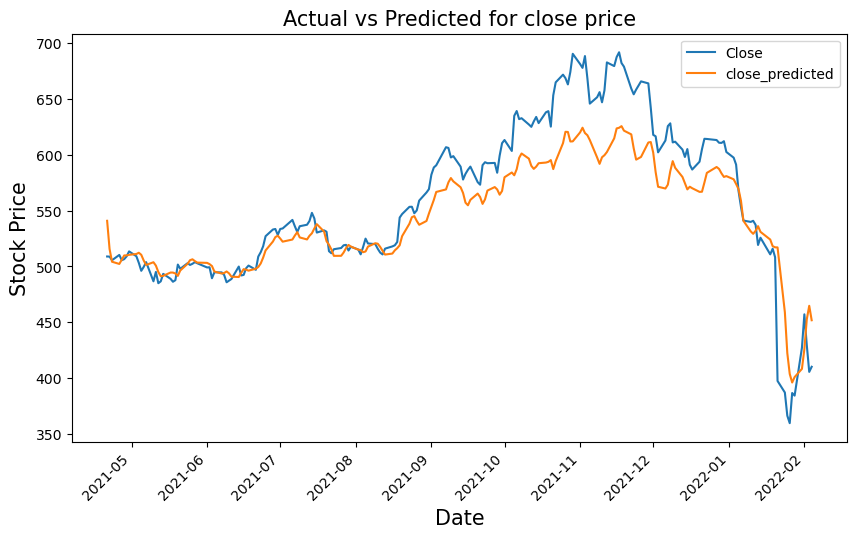

In [42]:
# plotting the actual close and predicted close prices on date index
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.savefig(r"C:\Users\Dell\gitproject\Stock Market prediction usng LSTM\images\Actual_vs predicted_close_price.png",format ='png')
plt.show()

In [33]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,545.868713,540.841675
2021-04-22,513.820007,508.779999,520.385010,515.597351
2021-04-23,509.010010,505.549988,507.707581,504.208862
2021-04-26,506.760010,510.299988,505.030487,502.226013
2021-04-27,512.619995,505.549988,508.580597,505.943420
...,...,...,...,...
2022-01-31,401.970001,427.140015,404.569672,408.292053
2022-02-01,432.959991,457.130005,421.449921,425.960144
2022-02-02,448.250000,429.480011,448.252716,452.743256


In [34]:
# Creating a dataframe and adding 10 days to existing index

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,461.266937,464.775330
2022-02-04,407.309998,410.170013,449.160858,451.831329
2022-02-04,NaN,NaN,NaN,NaN
2022-02-05,NaN,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN
2022-02-09,NaN,NaN,NaN,NaN
2022-02-10,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN


In [35]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [36]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 81ms/step


In [37]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

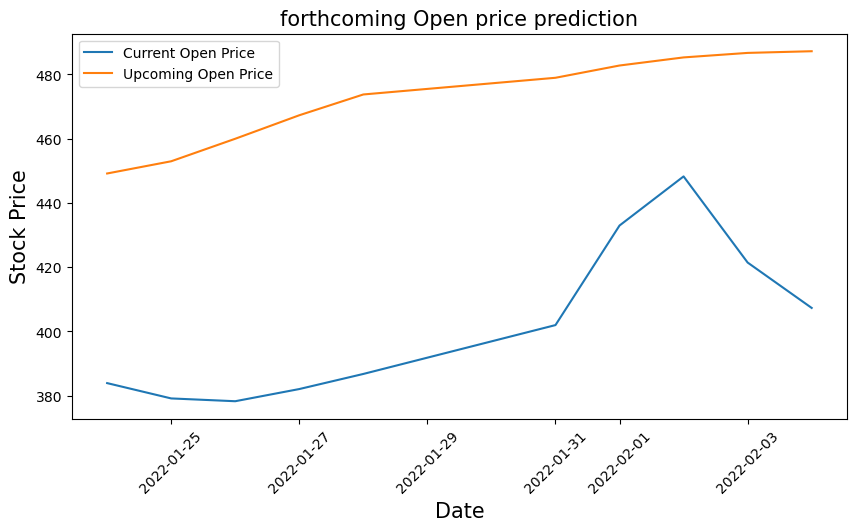

In [38]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

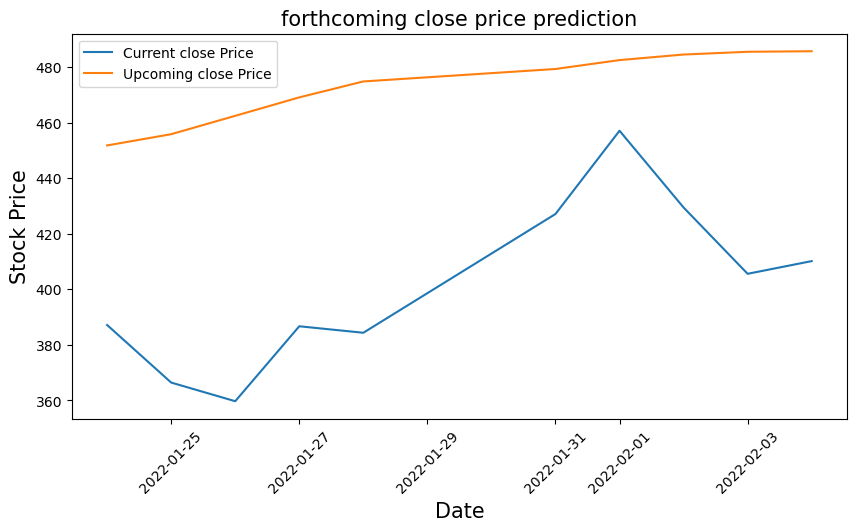

In [39]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()